<a href="https://colab.research.google.com/github/Yashasvi2003/Water_Potability_Detection/blob/main/Water_Potability_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##About the Dataset:
## The dataset can be found at:  https://www.kaggle.com/adityakadiwal/water-potability

In [ ]:
# Background:
# Access to safe drinking water is essential for health,
# recognized as a basic human right and a critical element of health protection policies.
# This issue is significant for health and development at national, regional, and local levels.
# Studies in certain regions indicate that investments in water supply and sanitation can provide net economic benefits,
# as the reduction in health issues and related healthcare expenses surpasses the cost of implementing these interventions.

In [ ]:
# Attributes:
# 1.pH Value: pH is an important parameter in evaluating the acid-base balnce of water.
# WHO has recommended a maximum permissablelimit of pH from 6.5 to 8.5.

# 2.Hardness: Hardness is more specifically caused by calcium and magnesium salts.
# these salts are dessolved from geologic deposits throgh which water travels.

# 3.Solids: Water has the ability to dissolve a wide range of inorganic and some organic minerals
# or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates, etc. These minerals produce unwanted taste and diluted color in apperanace of water.
# This is an important parameter for the use of water. Desirable limit of TDS is 500mg/l and maximum limit is 1000mg/l which is prescribed for drinking purpose.

# 4.Chloramines: Chlorine and chloramine are major disinfectants useed in public
# water systems. Chlorine levels up to 4 milligrams per liter (mg/l or 4 parts per million(ppm)) are considered safe in drinking water.

# 5.Sufate: Sulfates are naturally occurring substances thta are found in minerals, soil, and rocks. The principa; commercial use of sulfate is in checmical industry.
# it ranges from 3 to 30 mg/l in most freshwater supplies.

# 6.Conductivity: Increase in ions convcentartion enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. According to WHO standards, EC value should
# not exceed 400 μS/cm.

# 7.Oragnic_carbon: TOC(Total Organic Carbon) is a measure of the total amount of carbon in organic compounds in pure water.
# According to US EPA < 2 mg/L as TOC in treated / drinking water.

# 8.Trihalomethanes: THMs are chemicals which may be found in water treated with chlorine.
# THM levels up to 80 ppm is considered safe in drinking water.

# 9.Turbidity: It is a measure of light emitting properties of water and the test is used to
# indicate the quality of waste discharge with respect to colloidal matter. WHO recommended value is 5.00 NTU.

# 10.Potability: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('water_potability.csv') # read the dataset

In [3]:
df.head() #display the first five rows of the dataset

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
df.shape #print the shape of the dataset

(3276, 10)

In [5]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

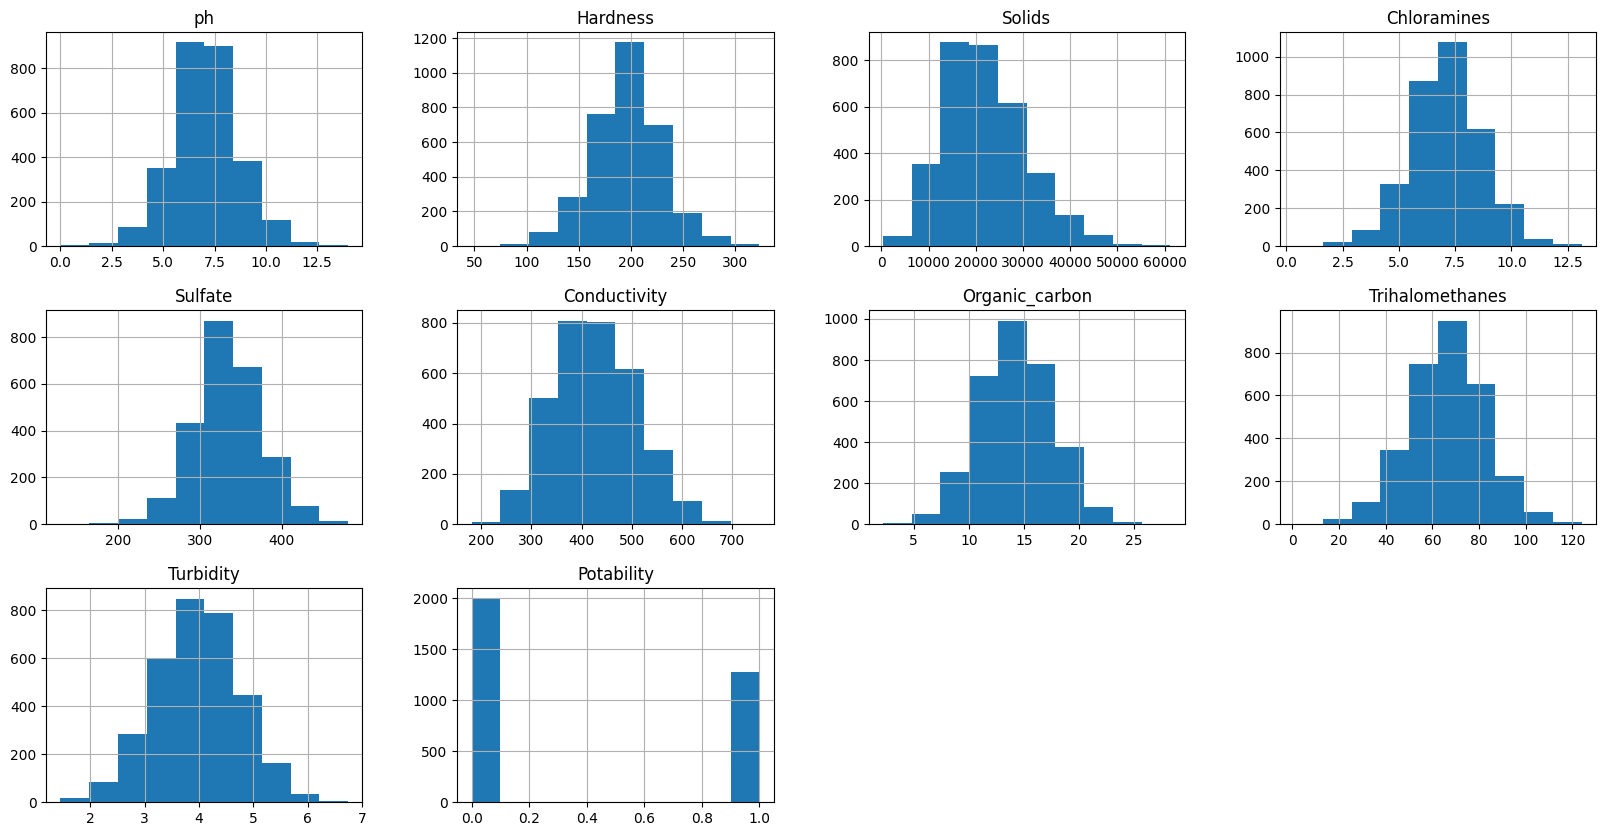

In [6]:
df.hist(figsize=(20,10), layout=(3,4))
plt.show()

In [7]:
# Handling missing values in the dataset
df.isnull().sum() #total number of NaN values in all columns

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
#Replace NaN values with the mdeian of those columns
df['ph']=df['ph'].fillna(df['ph'].mean())
df['Sulfate']=df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [9]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

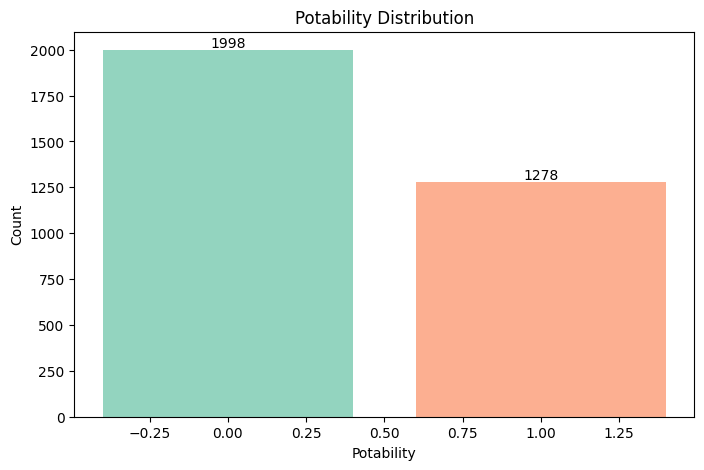

In [10]:
#Data Visualization with the help of Bar Chart
values = df['Potability'].value_counts()
labels = df['Potability'].value_counts().index

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['#66c2a5', '#fc8d62'], alpha=0.7)

# Adding titles and labels
plt.title('Potability Distribution')
plt.xlabel('Potability')
plt.ylabel('Count')

# Display percentage on top of bars
for index, value in enumerate(values):
    plt.text(index, value, f'{value}', ha='center', va='bottom')

plt.xticks(rotation=0)  # Rotate x labels if necessary
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

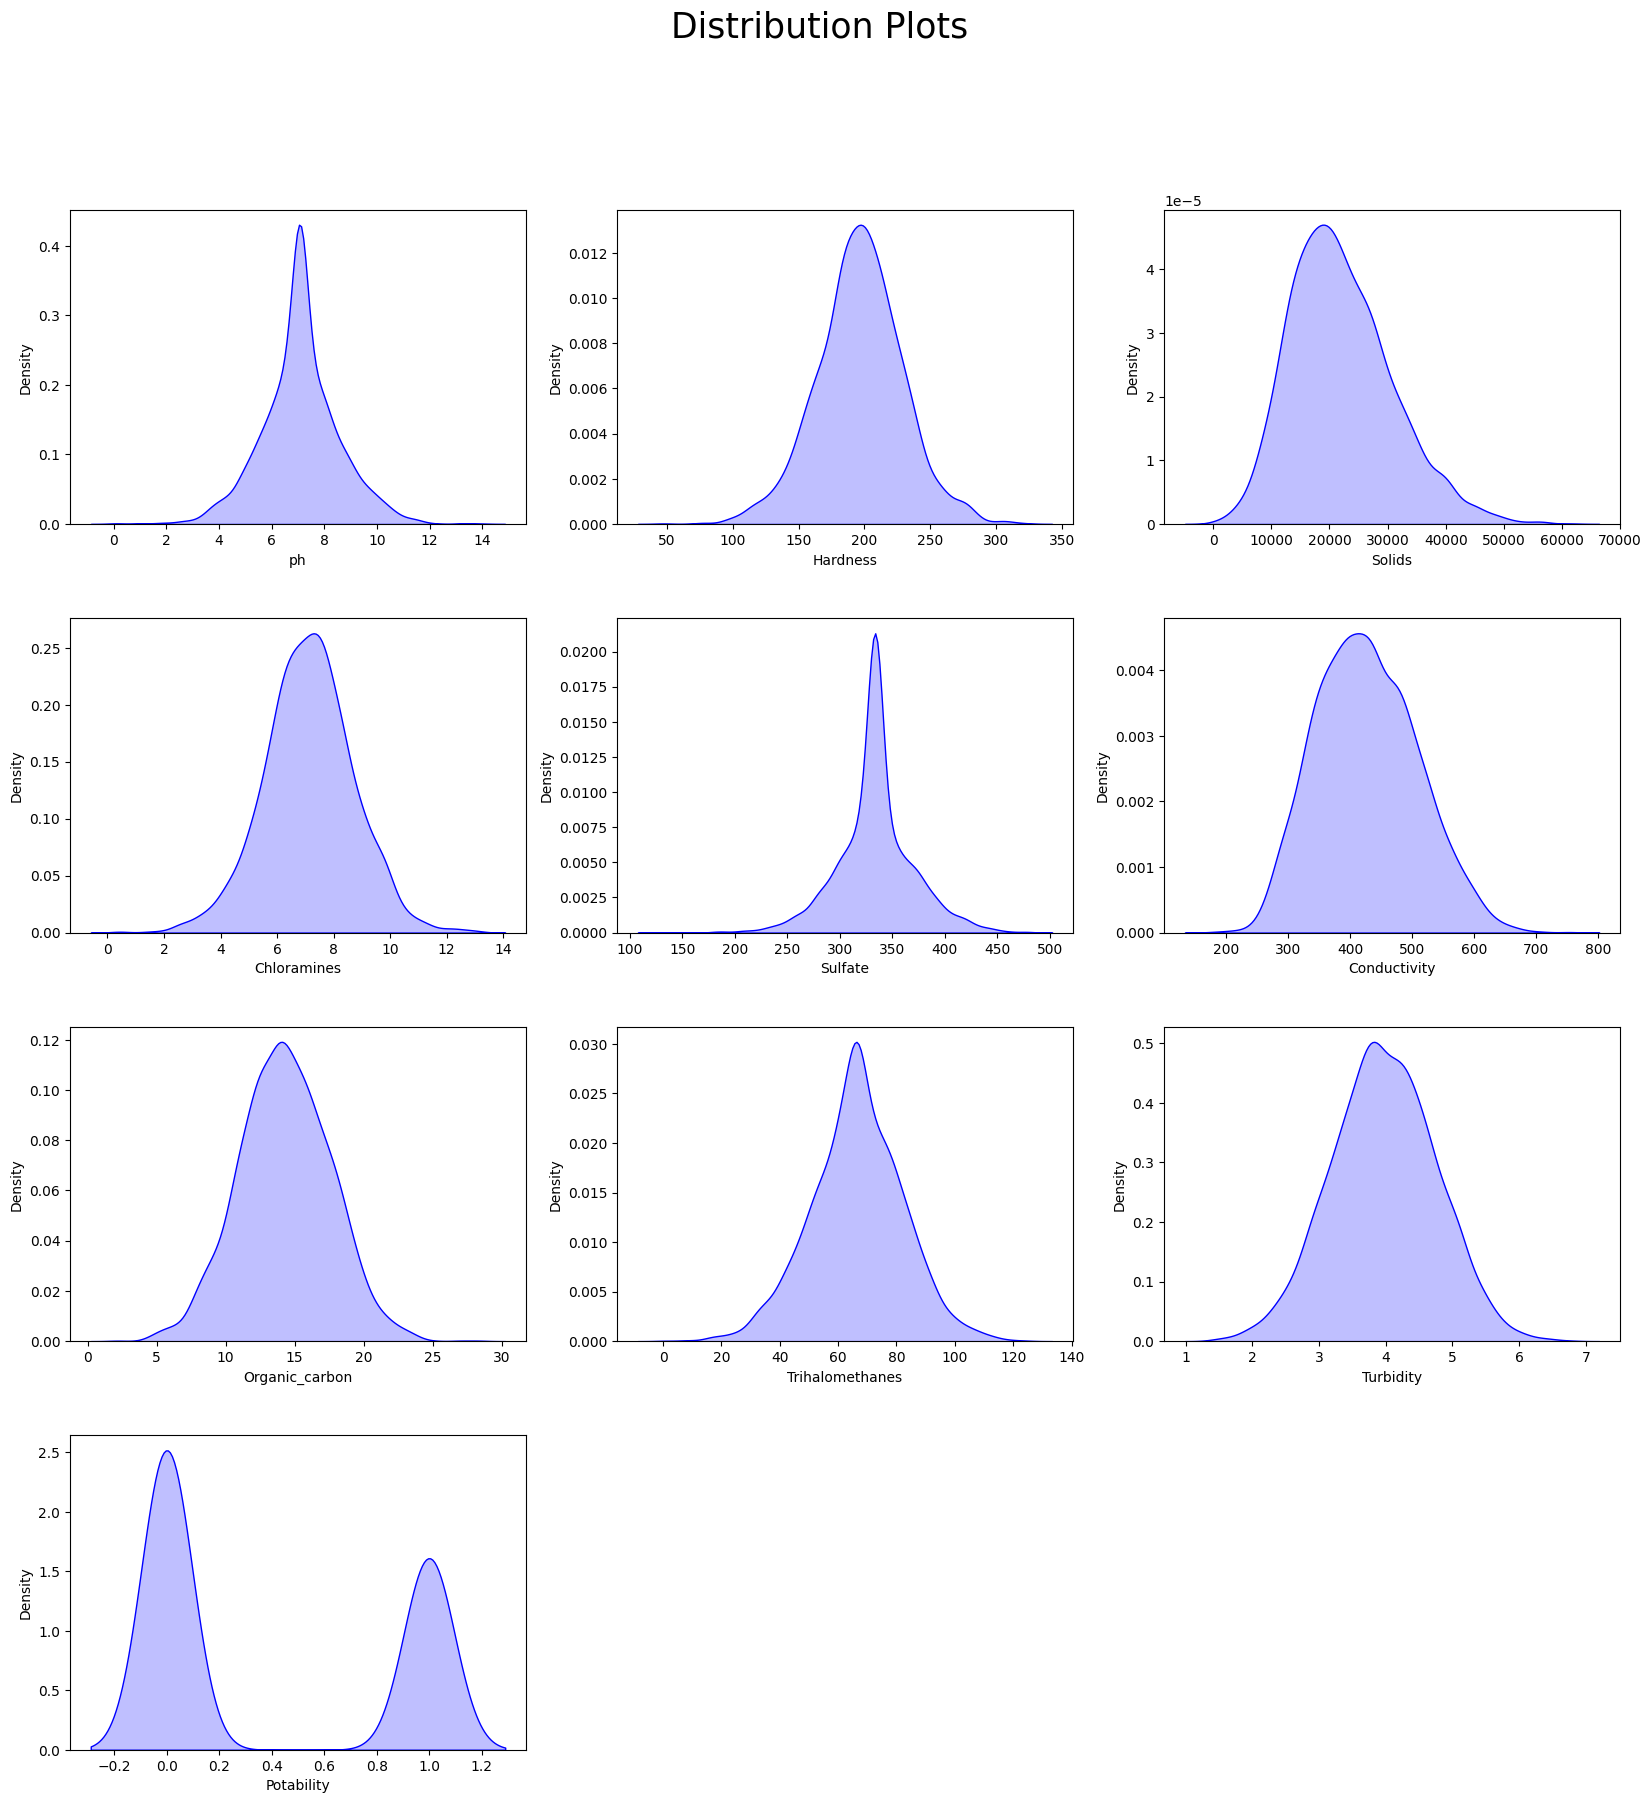

In [11]:
#distribution plots for each attribute
fig=plt.figure()
fig.suptitle("Distribution Plots", fontsize=25)
fig.subplots_adjust(wspace=0.2, hspace=0.3)
for i, x in enumerate(df.columns):
  a=fig.add_subplot(4,3,i+1)
  fig.set_figheight(20)
  fig.set_figwidth(20)
  sns.distplot(df[x], hist=False, color='blue', kde_kws={'shade':True})
plt.show

In [12]:
#observing that the solids graph is a bit skewed so hence to fix it we will apply transformation.
df['Solids']=np.power(df['Solids'],1/2)

<Axes: xlabel='Solids', ylabel='Density'>

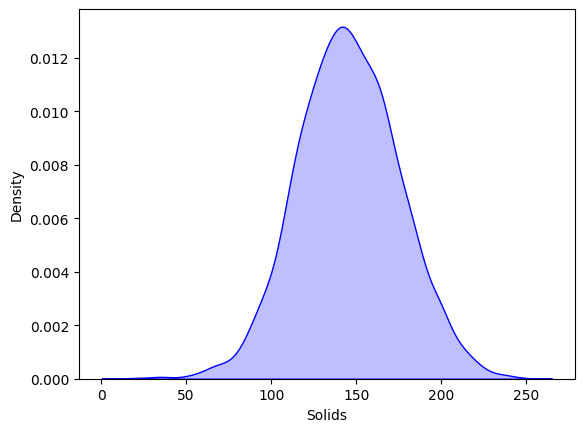

In [13]:
sns.distplot(df['Solids'], hist=False, color='blue', kde_kws={'shade':True})

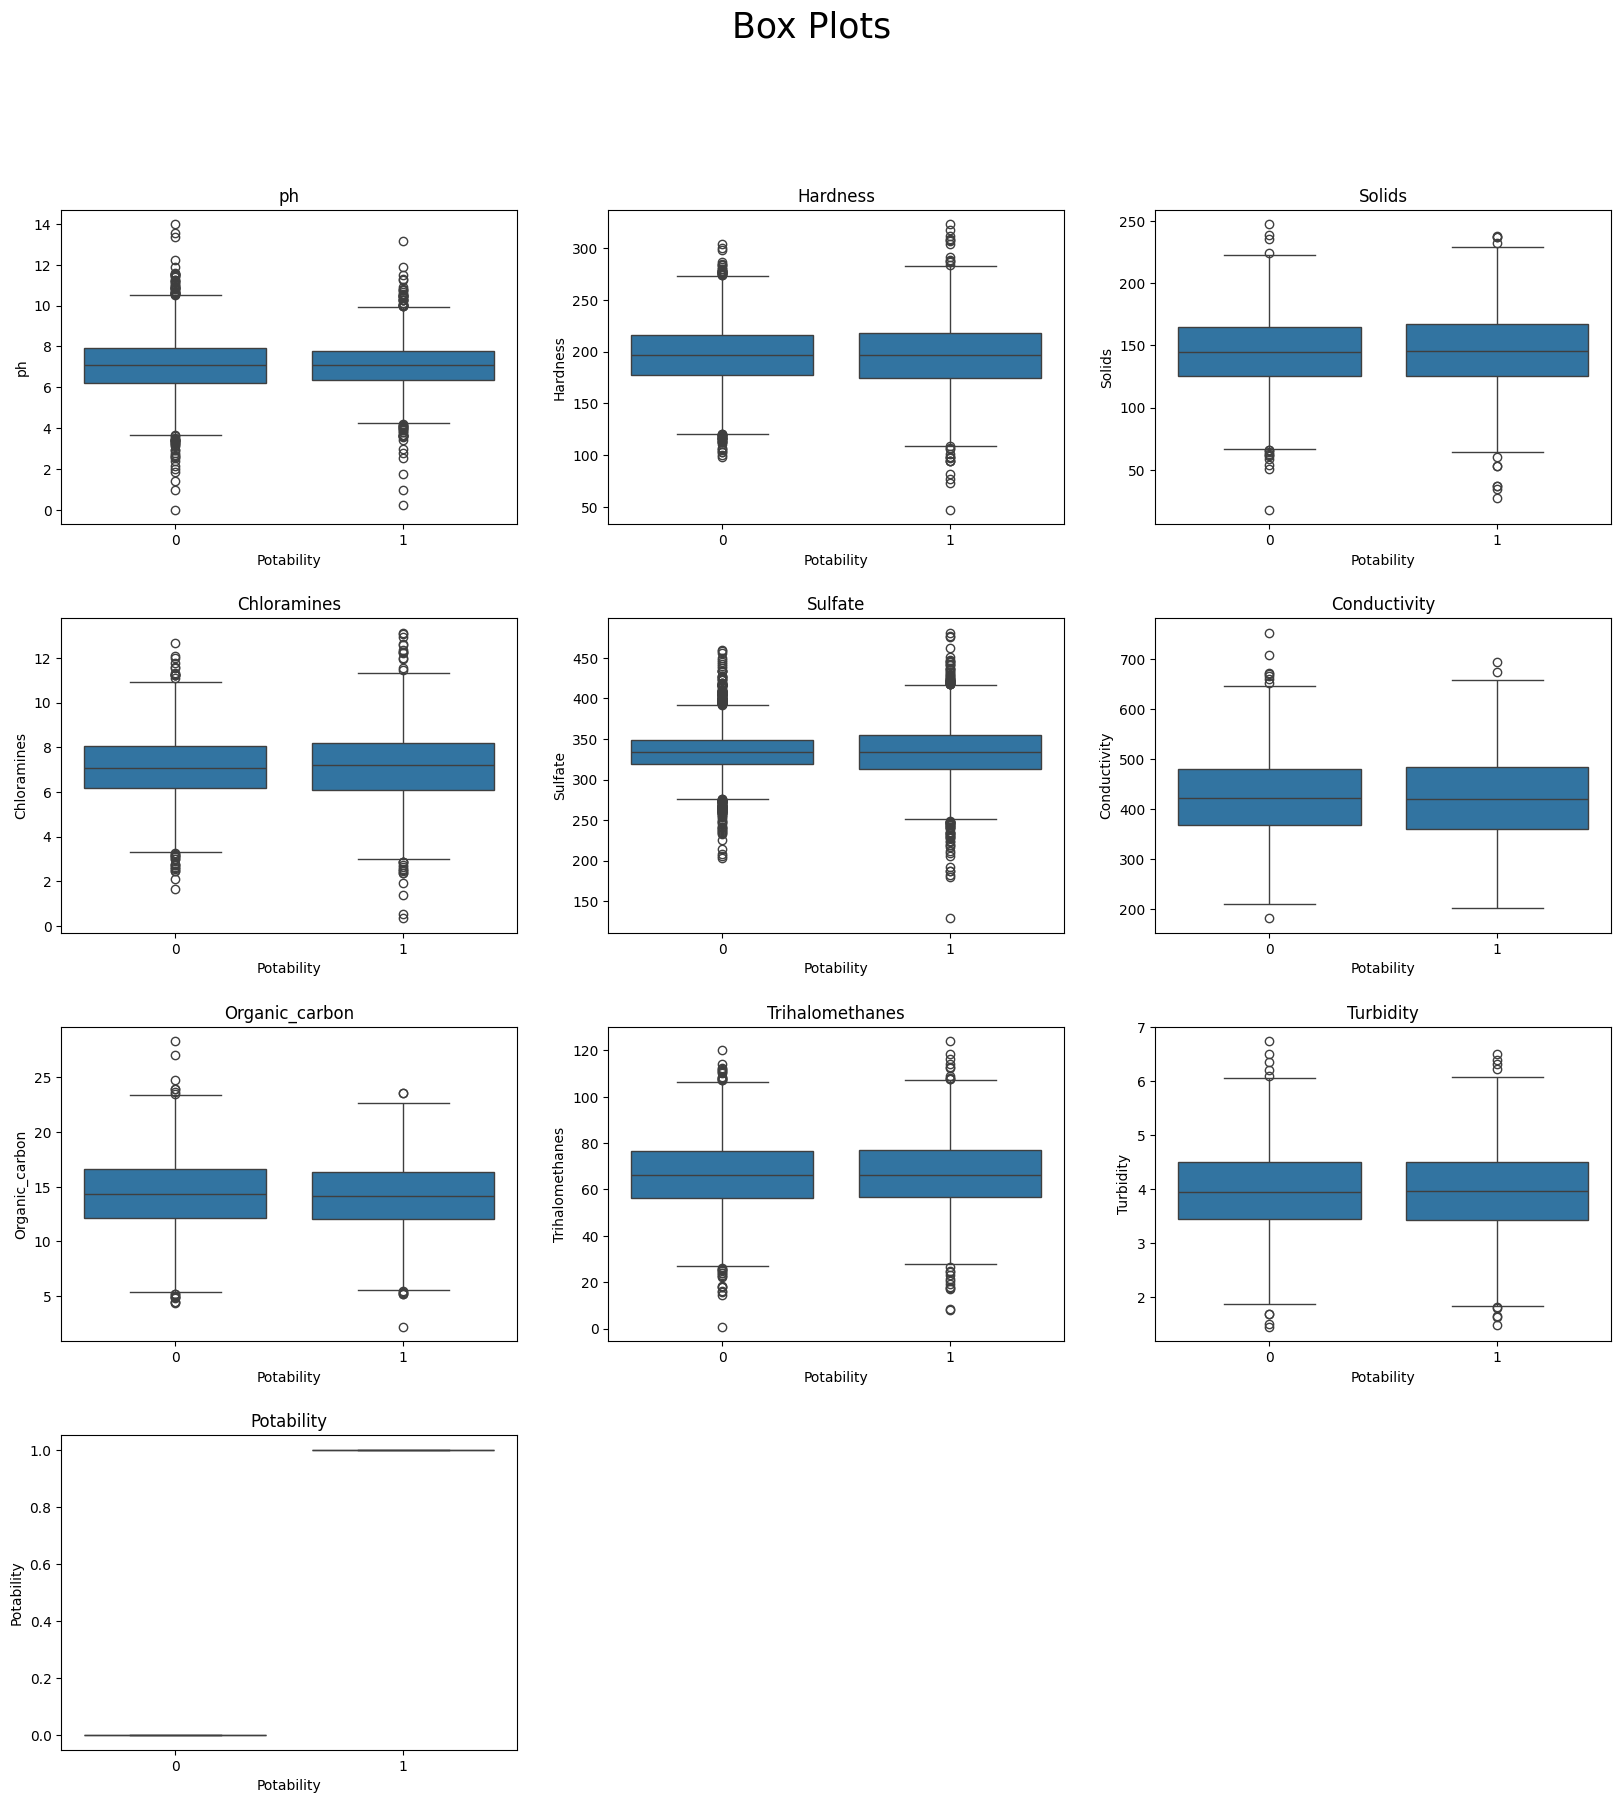

In [14]:
# Assuming df is your DataFrame
fig = plt.figure()
fig.suptitle("Box Plots", fontsize=25)
fig.subplots_adjust(wspace=0.2, hspace=0.3)

# Iterate over each column in the DataFrame
for i, x in enumerate(df.columns):
    ax = fig.add_subplot(4, 3, i + 1)  # Create a subplot in a 4x3 grid
    fig.set_figheight(20)  # Set the height of the figure
    fig.set_figwidth(20)   # Set the width of the figure

    # Create a box plot for each column with respect to 'Potability'
    sns.boxplot(x=df['Potability'], y=df[x], ax=ax)
    ax.set_title(x)  # Set title for each subplot

plt.show()

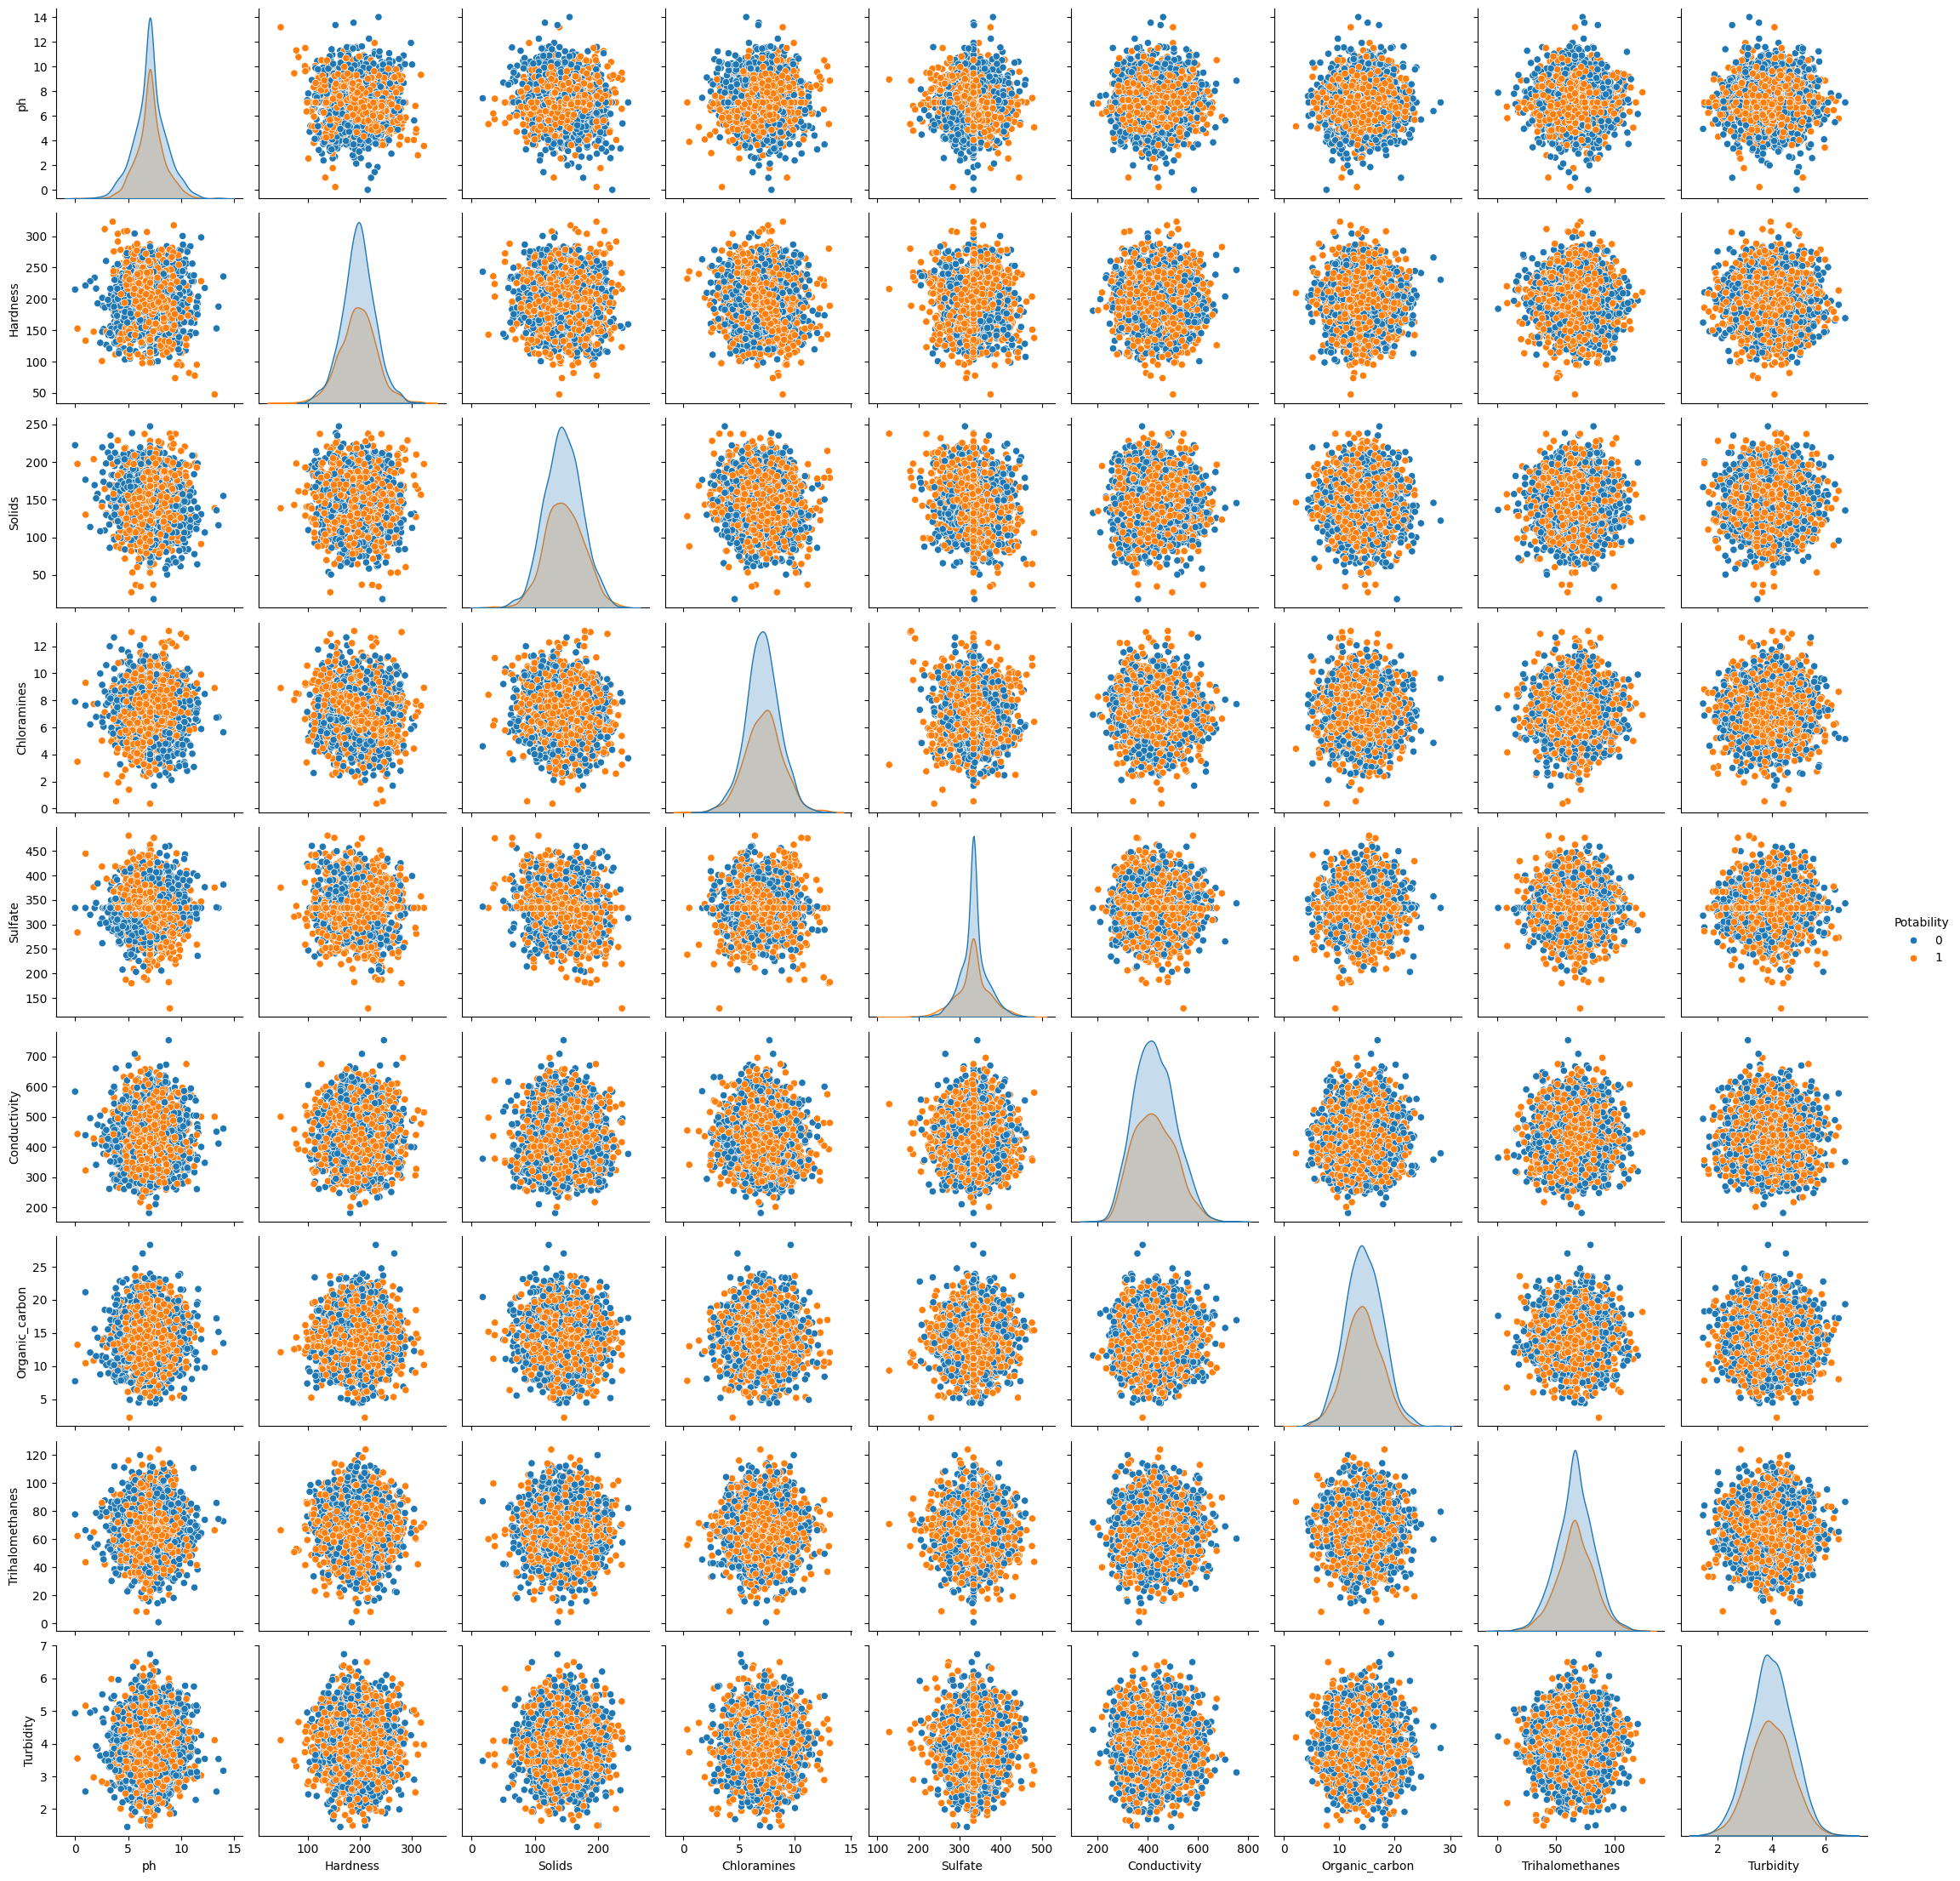

In [18]:
sns.pairplot(df, hue = "Potability")

<Axes: >

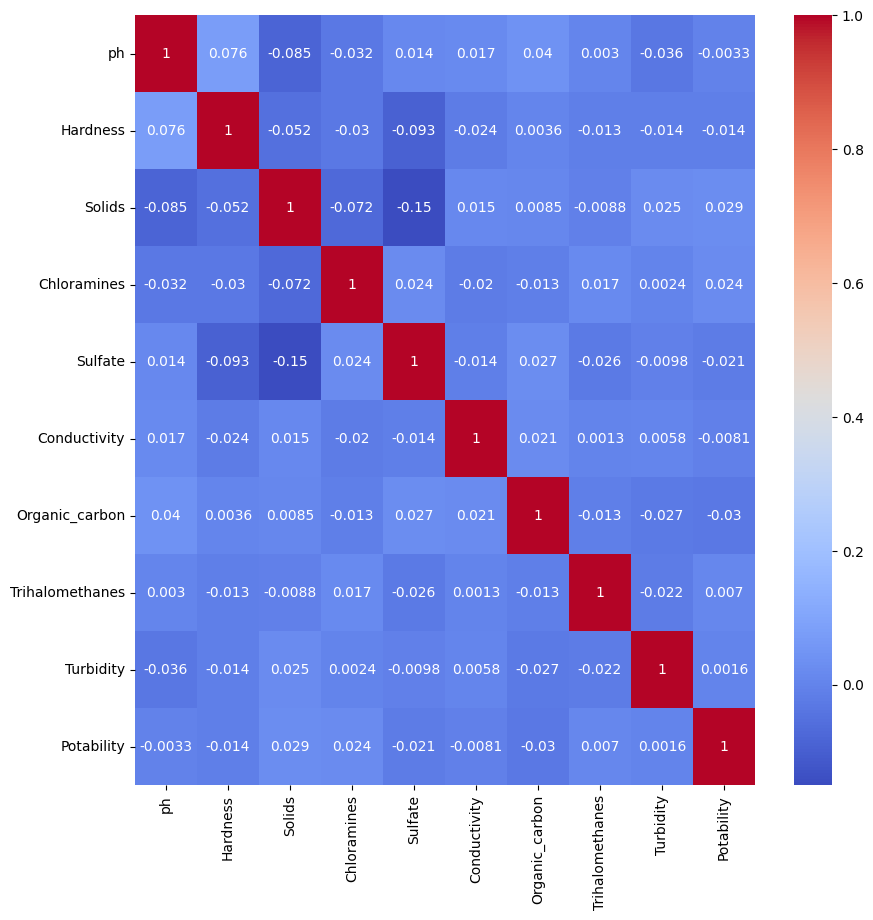

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [21]:
#Data Preprocessing: splitting data into train and tests
from sklearn.model_selection import train_test_split
x=df.drop('Potability', axis=1)
y=df['Potability']
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

In [23]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2620, 9), (2620,), (656, 9), (656,))

In [29]:
#Stardardizing the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train, y_train)
x_train_scaled=sc.transform(x_train)
x_test_scaled=sc.transform(x_test)

In [25]:
#Model Selection

In [30]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(x_train_scaled, y_train)

LogisticRegression()

In [31]:
y_logreg=logreg.predict(x_test_scaled)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_logreg, y_test),
      confusion_matrix(y_logreg, y_test),
      classification_report(y_logreg, y_test),
      sep='\n\n')

0.6234756097560976

[[409 247]
 [  0   0]]

              precision    recall  f1-score   support

           0       1.00      0.62      0.77       656
           1       0.00      0.00      0.00         0

    accuracy                           0.62       656
   macro avg       0.50      0.31      0.38       656
weighted avg       1.00      0.62      0.77       656



In [74]:
logreg_score=accuracy_score(y_logreg, y_test)

In [34]:
#since the logistic regression model is not classifying so let us try some other model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)
y_knn=knn.predict(x_test_scaled)

In [36]:
print(accuracy_score(y_logreg, y_test),
      confusion_matrix(y_logreg, y_test),
      classification_report(y_logreg, y_test),
      sep='\n\n')

0.6234756097560976

[[409 247]
 [  0   0]]

              precision    recall  f1-score   support

           0       1.00      0.62      0.77       656
           1       0.00      0.00      0.00         0

    accuracy                           0.62       656
   macro avg       0.50      0.31      0.38       656
weighted avg       1.00      0.62      0.77       656



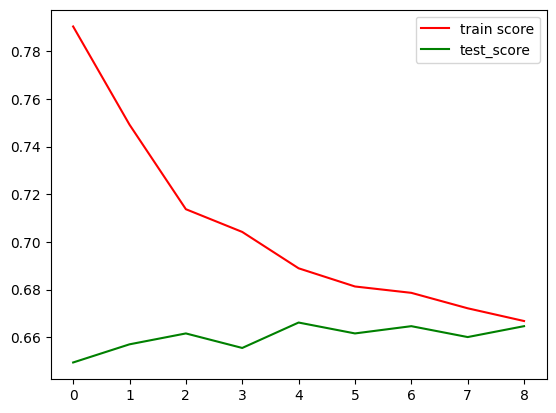

In [37]:
train_score = []
test_score = []
for n in range(2,20,2):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train_scaled, y_train)
    train_score.append(knn.score(x_train_scaled, y_train))
    test_score.append(knn.score(x_test_scaled, y_test))
plt.plot(train_score, color = 'r', label = 'train score')
plt.plot(test_score,color = 'g', label = 'test_score')
plt.legend()

In [38]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_scaled, y_train)
y_knn=knn.predict(x_test_scaled)

In [39]:
print(accuracy_score(y_logreg, y_test),
      confusion_matrix(y_logreg, y_test),
      classification_report(y_logreg, y_test),
      sep='\n\n')

0.6234756097560976

[[409 247]
 [  0   0]]

              precision    recall  f1-score   support

           0       1.00      0.62      0.77       656
           1       0.00      0.00      0.00         0

    accuracy                           0.62       656
   macro avg       0.50      0.31      0.38       656
weighted avg       1.00      0.62      0.77       656



In [40]:
knn_score=accuracy_score(y_knn, y_test)

In [41]:
#So hence we observe that KNN is working better logistic regression model, but it still does not make correct prediction about class 1

In [42]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train)
y_dt=dt.predict(x_test_scaled)

In [44]:
print(accuracy_score(y_dt, y_test),
      confusion_matrix(y_dt, y_test),
      classification_report(y_dt, y_test),
      sep='\n\n')

0.614329268292683

[[276 120]
 [133 127]]

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       396
           1       0.51      0.49      0.50       260

    accuracy                           0.61       656
   macro avg       0.59      0.59      0.59       656
weighted avg       0.61      0.61      0.61       656



In [ ]:
#The decision tree model is a bit better ,
# even though the accuracy score is lesser than the logreg model,
#  it is atleast acknowledging both the classes. In order to make this model better we will
# try tuning some hyperparameters like max_depth

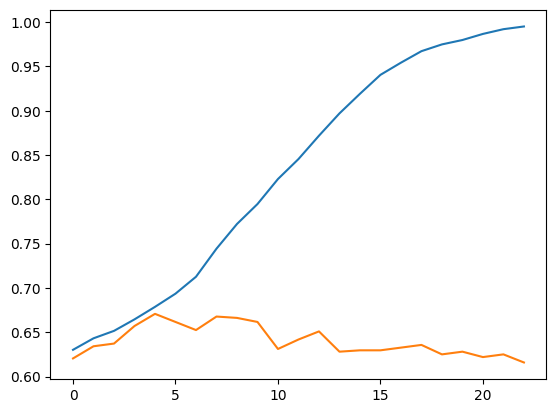

In [45]:
depths = range(2,25)
train_score = []
test_score = []
for max_depth in depths:
    dtc = DecisionTreeClassifier(max_depth = max_depth)
    dtc.fit(x_train_scaled, y_train)
    train_score.append(dtc.score(x_train_scaled, y_train))
    test_score.append(dtc.score(x_test_scaled, y_test))
plt.plot(train_score)
plt.plot(test_score)

In [46]:
from sklearn.model_selection import RandomizedSearchCV, KFold # KFold for creating cross validation sets
dtc_grid = {'max_depth' : range(2,30),
           'min_samples_split' : range(2, 100, 7),
           'min_samples_leaf' : range(2, 100, 7)}
dtc = DecisionTreeClassifier()
dtc_rcv = RandomizedSearchCV(dtc, param_distributions = dtc_grid, cv = KFold(n_splits =10), scoring = 'accuracy')

In [47]:
dtc_rcv.fit(x_train_scaled, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': range(2, 30),
                                        'min_samples_leaf': range(2, 100, 7),
                                        'min_samples_split': range(2, 100, 7)},
                   scoring='accuracy')

In [48]:
dtc_rcv.best_score_

0.6347328244274808

In [49]:
dtc_rcv.best_params_

{'min_samples_split': 93, 'min_samples_leaf': 9, 'max_depth': 4}

In [51]:
yhat_dtc = dtc_rcv.predict(x_test_scaled)

In [53]:
print(accuracy_score(yhat_dtc, y_test),
      confusion_matrix(yhat_dtc, y_test),
      classification_report(yhat_dtc, y_test),
      sep = '\n\n\n')

0.6402439024390244


[[396 223]
 [ 13  24]]


              precision    recall  f1-score   support

           0       0.97      0.64      0.77       619
           1       0.10      0.65      0.17        37

    accuracy                           0.64       656
   macro avg       0.53      0.64      0.47       656
weighted avg       0.92      0.64      0.74       656



In [55]:
dtc_score = accuracy_score(yhat_dtc, y_test)

In [ ]:
#So these are the best hyperparameters for our dataset, we can see that classification was a bit better on this model but it is still not ideal.

In [56]:
#Support Vector Classifier
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train_scaled, y_train)
y_svc=svc.predict(x_test_scaled)


In [58]:
print(accuracy_score(y_svc, y_test),
      confusion_matrix(y_svc, y_test),
      classification_report(y_svc, y_test),
      sep = '\n\n')

0.6920731707317073

[[386 179]
 [ 23  68]]

              precision    recall  f1-score   support

           0       0.94      0.68      0.79       565
           1       0.28      0.75      0.40        91

    accuracy                           0.69       656
   macro avg       0.61      0.72      0.60       656
weighted avg       0.85      0.69      0.74       656



In [73]:
svc_score = accuracy_score(y_svc, y_test)

In [ ]:
#This has been the best predictor so far as it is classifying the non-drinkable water well and has a higher overall accuracy.

In [60]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train_scaled, y_train)
#y_rfc=rfc.predict(x_test_scaled)
rfc.score(x_test_scaled, y_test)

0.6996951219512195

In [64]:
random_grid = {'n_estimators' : range(100,1000,100),
              'max_depth' : range(2,50,2),
              'min_samples_split' : range(2,100,7),
              'min_samples_leaf' : range(2,100,7)}
rfc_rcv = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid,
                             cv = KFold(n_splits = 5),scoring = 'accuracy', verbose = 2)

In [67]:
rfc_rcv.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, min_samples_leaf=79, min_samples_split=72, n_estimators=600; total time=   2.5s
[CV] END max_depth=30, min_samples_leaf=79, min_samples_split=72, n_estimators=600; total time=   2.9s
[CV] END max_depth=30, min_samples_leaf=79, min_samples_split=72, n_estimators=600; total time=   3.3s
[CV] END max_depth=30, min_samples_leaf=79, min_samples_split=72, n_estimators=600; total time=   2.6s
[CV] END max_depth=30, min_samples_leaf=79, min_samples_split=72, n_estimators=600; total time=   2.6s
[CV] END max_depth=32, min_samples_leaf=65, min_samples_split=72, n_estimators=400; total time=   1.8s
[CV] END max_depth=32, min_samples_leaf=65, min_samples_split=72, n_estimators=400; total time=   1.9s
[CV] END max_depth=32, min_samples_leaf=65, min_samples_split=72, n_estimators=400; total time=   2.6s
[CV] END max_depth=32, min_samples_leaf=65, min_samples_split=72, n_estimators=400; total time=   2.2s
[CV] END max

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(2, 50, 2),
                                        'min_samples_leaf': range(2, 100, 7),
                                        'min_samples_split': range(2, 100, 7),
                                        'n_estimators': range(100, 1000, 100)},
                   scoring='accuracy', verbose=2)

In [68]:
rfc_rcv.best_params_

{'n_estimators': 300,
 'min_samples_split': 51,
 'min_samples_leaf': 37,
 'max_depth': 16}

In [69]:
yhat_rfc = rfc_rcv.predict(x_test_scaled)
print(accuracy_score(yhat_rfc, y_test),
      confusion_matrix(yhat_rfc, y_test),
      classification_report(yhat_rfc, y_test),
      sep = '\n\n')

0.663109756097561

[[396 208]
 [ 13  39]]

              precision    recall  f1-score   support

           0       0.97      0.66      0.78       604
           1       0.16      0.75      0.26        52

    accuracy                           0.66       656
   macro avg       0.56      0.70      0.52       656
weighted avg       0.90      0.66      0.74       656



In [70]:
rfc_score = accuracy_score(yhat_rfc, y_test)

In [75]:
scores = [logreg_score, dtc_score, svc_score, rfc_score, knn_score]
scores_df = pd.DataFrame(scores, index = ['Logistic Regression', 'Decision Tree', 'Support Vector Classifier', 'Random Forest', 'K-nearest neighbors'])
scores_df.rename(columns = {0 : 'Scores'}, inplace = True)

<Axes: >

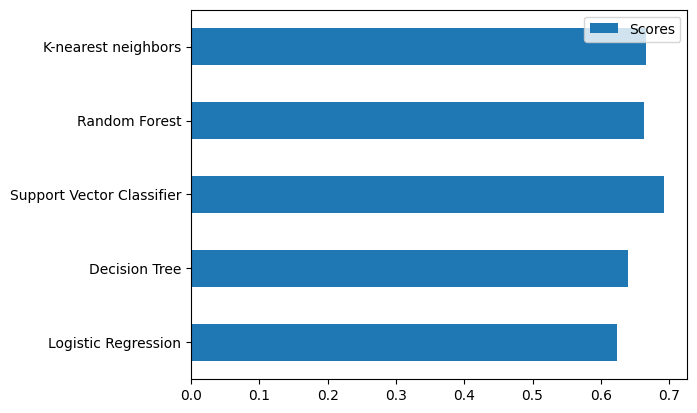

In [76]:
scores_df.plot(kind='barh')